<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="../figures/PDSH-cover-small.png">
*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Comparisons, Masks, and Boolean Logic](02.06-Boolean-Arrays-and-Masks.ipynb) | [Contents](Index.ipynb) | [Sorting Arrays](02.08-Sorting.ipynb) >

# Fancy Indexing

In the previous sections, we saw how to access and modify portions of arrays **using simple indices (e.g., ``arr[0]``), slices (e.g., ``arr[:5]``), and Boolean masks (e.g., ``arr[arr > 0]``).**
In this section, we'll look at another style of array indexing, known as *fancy indexing*.
**Fancy indexing** is like the simple indexing we've already seen, but we **pass arrays of indices in place of single scalars.**
This allows us to very quickly access and modify complicated subsets of an array's values.

## Exploring Fancy Indexing

**Fancy indexing is conceptually simple: it means passing an array of indices to access multiple array elements at once.**
For example, consider the following array:

- fancy indexing에서 **"fancy"**라는 단어는 "화려한", "복잡한", "고급스러운" 이라는 뜻

- fancy indexig : "기존 인덱싱보다 더 고급스럽고 복잡한 방식의 인덱싱" 

 > 기본적(individual / regular) 인덱싱보다 더 강력하고 유연한 인덱싱 방식  >> 고급 / 특별 / 확장된” 인덱싱

 > 여러 위치/블리언 마스크로 원하는 요소만 선택

In [1]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


Suppose we want to access three different elements. We could do it like this:

In [4]:
[x[3], x[7], x[2]]

[np.int32(71), np.int32(86), np.int32(14)]

Alternatively, we can pass a single list or array of indices to obtain the same result:

In [2]:
ind = [3, 7, 4]
print(x[ind])

[71 86 60]


When using fancy indexing, the shape of the result reflects the shape of the *index arrays* rather than the shape of the *array being indexed*:

In [4]:
ind = np.array([[3, 7],
                [4, 5]])
print(x[ind])

[[71 86]
 [60 20]]


x[ind]처럼 정수 배열로 인덱싱할::

- 인덱스 배열의 shape에 맞춰서 결과 배열도 그 shape으로 만들어지는 것

- fancy indexing의 핵심 특징

Fancy indexing also works in multiple dimensions. Consider the following array:

In [5]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Like with standard indexing, the first index refers to the row, and the second to the column:

In [12]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [ ]:
X[[0, 2]][:, [1, 3]] #모든 행(:)에서 열 인덱스 1과 3만 선택

array([[ 1,  3],
       [ 9, 11]])

X[row, col]  ==  [ X[0,2],  X[1,1],  X[2,3] ]

row와 col이 동일한 길이를 가진 경우 "좌표 목록"으로 간주하여 각 점을 수집하는 방식.

Notice that the first value in the result is ``X[0, 2]``, the second is ``X[1, 1]``, and the third is ``X[2, 3]``.
The pairing of indices in fancy indexing follows all the broadcasting rules that were mentioned in [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb).
So, for example, if we combine a column vector and a row vector within the indices, we get a two-dimensional result:

X[row, col] → 점(point) 선택

X[row[:, np.newaxis], col] → 브로드캐스팅으로 격자(grid) 선택

row → shape (3,)

row[:, np.newaxis] → shape (3, 1)

col → shape (3,)

정수 배열 인덱싱은 shape를 기준으로 동작

두 배열 shape이 같으면 → 좌표별 매칭(1:1)

shape이 브로드캐스트 가능하면 → 격자(grid) 생성

In [ ]:
X[row[:, np.newaxis], col] # 인덱스의 브로드캐스팅

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

- row[:, np.newaxis]는 shape을 바꿈

row.shape == (3,)               # 원래는 1차원

row[:, np.newaxis] → shape == (3, 1)


- Broadcasting된 인덱스 쌍 만들기

- row[:, np.newaxis] shape: (3, 1)

- col shape: (3,)

NumPy의 broadcasting 규칙에 따라 두 배열을 합치면:

- row: (3, 1) → 각 행마다 같은 행 인덱스를 복제

- col: (1, 3) → 각 열마다 같은 열 인덱스를 복제

- 최종적으로 (3, 3) shape의 인덱스 쌍들이 생성: (0,0), (0,1), (0,2) ,,, (2,0), (2,1), (2,2)

Here, each row value is matched with each column vector, exactly as we saw in broadcasting of arithmetic operations.
For example:

In [8]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

(3, 1) * (3,)

- (3, 1) × (1, 3)로 확장
- 결과 shape은 (3, 3)

It is always important to remember with fancy indexing that the return value reflects the *broadcasted shape of the indices*, rather than the shape of the array being indexed.

## Combined Indexing

For even more powerful operations, fancy indexing can be combined with the other indexing schemes we've seen:

In [8]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


We can combine fancy and simple indices:

In [9]:
X[2, [2, 0, 1]] # 단순 인덱스 + 팬시 인덱스 

array([10,  8,  9])

We can also combine fancy indexing with slicing:

In [10]:
X[1:, [2, 0, 1]] # 슬라이싱 + 팬시 인덱스

array([[ 6,  4,  5],
       [10,  8,  9]])

And we can combine fancy indexing with masking:

In [13]:
print(row[:, np.newaxis])

[[0]
 [1]
 [2]]


In [11]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask] # 행은 팬시 인덱스, 열은 마스킹
# 각 행 인덱스 i에 대해, X[i][mask] 를 적용

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

- row[:, np.newaxis] shape: (3, 1)

- mask shape: (4,)

- 결과적으로 (3, 1) vs (4,) → → 브로드캐스트되어 (3, 4)처럼 동작

- 조건 X[rows, mask]는 각 행마다 동일한 mask를 적용한 것처럼 작동

[
    
 X[0][mask] → [0, 2],

 X[1][mask] → [4, 6],

 X[2][mask] → [8, 10]

]


All of these indexing options combined lead to a very flexible set of operations for accessing and modifying array values.

## Example: Selecting Random Points

**One common use of fancy indexing is the selection of subsets of rows from a matrix.**
For example, we might have an $N$ by $D$ matrix representing $N$ points in $D$ dimensions, such as the following points drawn from a two-dimensional normal distribution:

공분산(covariance)은 두 변수의 값이 함께 얼마나 변하는지(동시에 증가·감소하는 경향이 있는지) 를 나타내는 통계적 지표

x₁와 x₂의 공분산

여기서 공분산 = 2 (양수) → x₁가 증가할 때 x₂도 증가하는 경향

In [14]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

Using the plotting tools we will discuss in [Introduction to Matplotlib](04.00-Introduction-To-Matplotlib.ipynb), we can visualize these points as a scatter-plot:

In [16]:
%pip install matplotlib

  Using cached matplotlib-3.10.7-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp311-cp311-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp311-cp311-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.7-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl (225 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp311-cp311-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl (73 kB)
Using cached pillow-12.0.0-cp311-cp311-win_amd64.whl (7.0 MB)
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)
Note: you may need to restart the kernel to use updated packages.


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


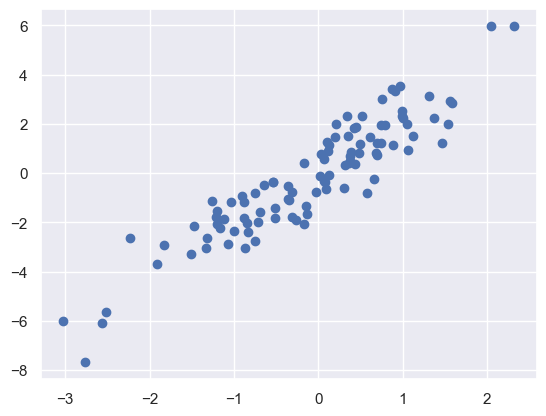

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # 플롯 스타일 설정

plt.scatter(X[:, 0], X[:, 1]);

Let's use fancy indexing to select 20 random points. We'll do this by first choosing 20 random indices with no repeats, and use these indices to select a portion of the original array:

In [21]:
print(X.shape)

(100, 2)


In [19]:
indices = np.random.choice(X.shape[0], 20, replace=False)  # replace=false는 인덱스를 중복하지 않는다 
indices

array([16, 85, 91, 72, 30, 45, 12, 23, 70, 26, 41, 95, 15, 18, 20, 59, 28,
       57, 87, 54], dtype=int32)

In [22]:
selection = X[indices]  # 여기에서 팬시 인덱싱 사용
selection.shape

(20, 2)

Now to see which points were selected, let's over-plot large circles at the locations of the selected points:

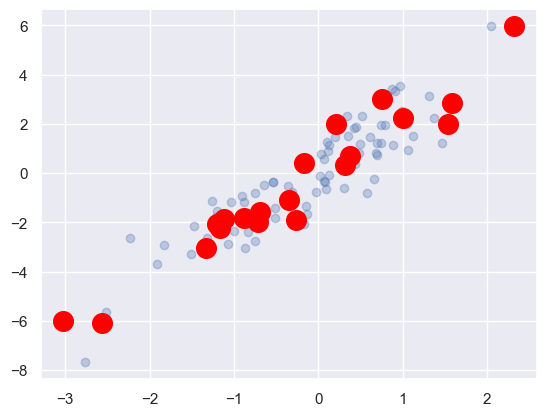

In [30]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3) # 알파는 투명도
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='red', s=200); #s는 점의 크기

This sort of strategy is often **used to quickly partition datasets, as is often needed in train/test splitting for validation** of statistical models (see [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb)), and in sampling approaches to answering statistical questions.

## Modifying Values with Fancy Indexing

Just as fancy indexing can be used to access parts of an array, it can also be used to modify parts of an array.
For example, imagine we have an array of indices and we'd like to set the corresponding items in an array to some value:

In [31]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99 # 팬시 인덱싱
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


We can use any assignment-type operator for this. For example:

In [32]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


Notice, though, that repeated indices with these operations can cause some potentially unexpected results. Consider the following:

In [34]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


x[[0, 0]]는 위치 0을 두 번 참조

= [4, 6] → 첫 번째 0번에 4를 쓰고,→ 두 번째 0번에 6을 씀

- 4가 쓰인 뒤, 6이 그 위에 덮어씌워짐

Where did the 4 go? The result of this operation is to first assign ``x[0] = 4``, followed by ``x[0] = 6``.
The result, of course, is that ``x[0]`` contains the value 6.

Fair enough, but consider this operation:

In [35]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1 # 팬시 인덱스에 의해 한번만 가져온다 
# 내부적으로는 실제로는 x[i]를 먼저 복사 → 연산 → 다시 저장의 방식
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

tmp = x[i]      # 인덱싱 결과가 별도의 배열로 만들어짐
tmp += 1
x[i] = tmp      # 마지막에 한 번에 대입됨

-> 중복 인덱스에 대해 차례대로 반복 적용되지 않고, 

   인덱스 선택과 연산이 “벡터 연산(병렬 연산)”으로 한 번에 처리되기 때문에 
   
   중복이 누적되지 않음 

**You might expect that ``x[3]`` would contain the value 2, and ``x[4]`` would contain the value 3**, as this is how many times each index is repeated. Why is this not the case?
Conceptually, this is because ``x[i] += 1`` is meant as a shorthand of ``x[i] = x[i] + 1``. ``x[i] + 1`` is evaluated, and then the result is assigned to the indices in x.
With this in mind, it is not the augmentation that happens multiple times, but the assignment, which leads to the rather nonintuitive results.

So what if you want the other behavior where the operation is repeated? For this, you can use the ``at()`` method of ufuncs (available since NumPy 1.8), and do the following:

In [36]:
x = np.zeros(10)
np.add.at(x, i, 1) # 지정된 인덱스에 대한 in-place add를 한다 > 누적된다 
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


The ``at()`` method does an in-place application of the given operator at the specified indices (here, ``i``) with the specified value (here, 1).
Another method that is similar in spirit is the ``reduceat()`` method of ufuncs, which you can read about in the NumPy documentation.

## Example: Binning Data

You can use these ideas **to efficiently bin data to create a histogram** by hand.
For example, imagine we have 1,000 values and would like to quickly find where they fall within an array of bins.
We could compute it using ``ufunc.at`` like this:
- bin: 구간, bucket이라는 통계적 의미로 사용

In [37]:
import numpy as np

In [38]:
np.random.seed(42)
x = np.random.randn(100)

# 직접 히스토그램 계산하기
bins = np.linspace(-5, 5, 20) # 20개 구간
counts = np.zeros_like(bins)# bins와 동일한 크기의 배열 > 0으로 초기화

# 각 x에 대해 적절한 구간 찾기
i = np.searchsorted(bins, x) #i가 팬시 인덱스로 사용

# 이 구간 각각에 1 더하기
np.add.at(counts, i, 1) # counts[i] += 1로 해석석

In [39]:
i.shape

(100,)

In [40]:
bins

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

In [41]:
counts

array([ 0.,  0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,
        7.,  1.,  0.,  0.,  0.,  0.,  0.])

The counts now reflect the number of points within each bin–in other words, a histogram:

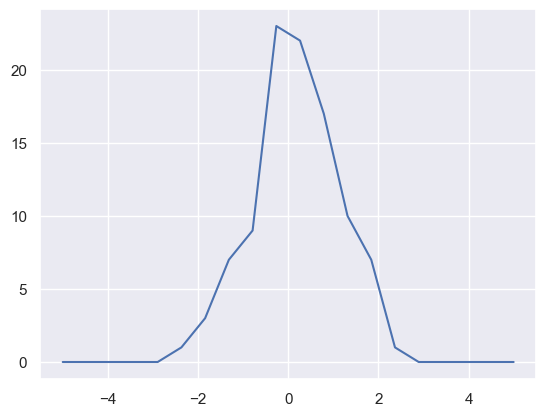

In [42]:
# 결과 플로팅하기
plt.plot(bins, counts, linestyle='solid');

Of course, it would be silly to have to do this each time you want to plot a histogram.
This is why Matplotlib provides the ``plt.hist()`` routine, which does the same in a single line:

```python
plt.hist(x, bins, histtype='step');
```

This function will create a nearly identical plot to the one seen here.
To compute the binning, ``matplotlib`` uses the ``np.histogram`` function, which does a very similar computation to what we did before. Let's compare the two here:

(array([ 0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,  7.,
         1.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 [<matplotlib.patches.Polygon at 0x249847281d0>])

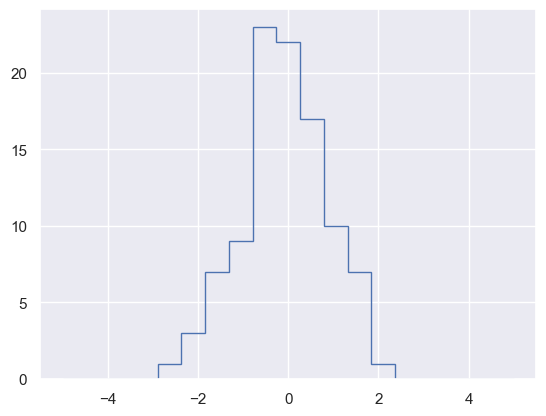

In [21]:
plt.hist(x,bins,histtype='step')

In [7]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
15.8 µs ± 148 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Custom routine:
9.06 µs ± 73.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Our own one-line algorithm is several times faster than the optimized algorithm in NumPy! How can this be?
If you dig into the ``np.histogram`` source code (you can do this in IPython by typing ``np.histogram??``), you'll see that it's quite a bit more involved than the simple search-and-count that we've done; this is because NumPy's algorithm is more flexible, and particularly is designed for better performance when the number of data points becomes large:

In [26]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
104 ms ± 2.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
206 ms ± 3.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


What this comparison shows is that algorithmic efficiency is almost never a simple question. An algorithm efficient for large datasets will not always be the best choice for small datasets, and vice versa (see [Big-O Notation](02.08-Sorting.ipynb#Aside:-Big-O-Notation)).
But the advantage of coding this algorithm yourself is that with an understanding of these basic methods, you could use these building blocks to extend this to do some very interesting custom behaviors.
The key to efficiently using Python in data-intensive applications is knowing about general convenience routines like ``np.histogram`` and when they're appropriate, but also knowing how to make use of lower-level functionality when you need more pointed behavior.

<!--NAVIGATION-->
< [Comparisons, Masks, and Boolean Logic](02.06-Boolean-Arrays-and-Masks.ipynb) | [Contents](Index.ipynb) | [Sorting Arrays](02.08-Sorting.ipynb) >